In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from numpy import linalg as LA
import sys
from scipy.spatial.distance import cdist
sys.path.insert(1, 'D:/data/ee559hw1/python3/')
# sys.path.insert(1, 'C:/Documents/GitHub/EE559-PatternReg/')
import plotDecBoundaries
# from plotDecBoundaries import plotDecBoundaries_2class

In [2]:
import plotDecBoundaries

In [4]:
# define a classifier
class nearest_mean_classifier():
    def __init__(self) -> None:
        self.label_list = None
        self.mean_list = None
    def fit(self, synthetic1_train, labels):
        label_list = set(labels)
        self.label_list = label_list
        mean_list = {}
        for label in label_list:
            index = np.where(labels==label)
            mean_list[label] = np.mean(synthetic1_train[:][index],axis=0)
        self.mean_list = mean_list
        return mean_list
    def predict_ovo(self):
        # mid_12 = 
        # g_1 = 
        return 0
    def print_all(self):
        print('label list \n',self.label_list)
        print('mean_list \n',self.mean_list)

# Question 2

In [5]:
wine_train = genfromtxt('D:\data\ee559hw1\python3\wine_train.csv', delimiter=',')
wine_test = genfromtxt('D:\data\ee559hw1\python3\wine_test.csv', delimiter=',')

In [6]:
model_wine = nearest_mean_classifier()
mean_list_wine = model_wine.fit(wine_train[:,[0,1]], wine_train[:,13])

In [7]:
mean_list_wine[1].reshape(1,2)

array([[13.675,  1.904]])

Classification on train data

In [8]:
g_12 = cdist(wine_train[:,:2],mean_list_wine[2].reshape(1,2), 'euclidean')\
 - cdist(wine_train[:,:2],mean_list_wine[1].reshape(1,2), 'euclidean')
g_23 = cdist(wine_train[:,:2],mean_list_wine[3].reshape(1,2), 'euclidean')\
 - cdist(wine_train[:,:2],mean_list_wine[2].reshape(1,2), 'euclidean')
g_31 = cdist(wine_train[:,:2],mean_list_wine[1].reshape(1,2), 'euclidean')\
 - cdist(wine_train[:,:2],mean_list_wine[3].reshape(1,2), 'euclidean')
g_21 = -g_12
g_32 = -g_23
g_13 = -g_31
decision_ovo = []
for i in range(len(wine_train)):
    if(g_12[i]>0 and g_13[i]>0):
        decision_ovo.append(1)
    elif(g_23[i]>0  and g_21[i]>0):
        decision_ovo.append(2)
    else:
        decision_ovo.append(3)
decision_ovo = np.array(decision_ovo)
true_label2 = wine_train[:,13]
error_rate_wine = np.mean( true_label2 != decision_ovo )
classification_accuracy = 1 - error_rate_wine
classification_accuracy

0.797752808988764

Classification accuracy on test data

In [9]:
g_12 = cdist(wine_test[:,:2],mean_list_wine[2].reshape(1,2), 'euclidean')\
 - cdist(wine_test[:,:2],mean_list_wine[1].reshape(1,2), 'euclidean')
g_23 = cdist(wine_test[:,:2],mean_list_wine[3].reshape(1,2), 'euclidean')\
 - cdist(wine_test[:,:2],mean_list_wine[2].reshape(1,2), 'euclidean')
g_31 = cdist(wine_test[:,:2],mean_list_wine[1].reshape(1,2), 'euclidean')\
 - cdist(wine_test[:,:2],mean_list_wine[3].reshape(1,2), 'euclidean')
g_21 = -g_12
g_32 = -g_23
g_13 = -g_31


In [10]:
decision_ovo = []
for i in range(len(wine_test)):
    if(g_12[i]>0 and g_13[i]>0):
        decision_ovo.append(1)
    elif(g_23[i]>0  and g_21[i]>0):
        decision_ovo.append(2)
    else:
        decision_ovo.append(3)
decision_ovo = np.array(decision_ovo)

In [11]:
true_label2 = wine_test[:,13]
error_rate_wine = np.mean( true_label2 != decision_ovo )
classification_accuracy = 1 - error_rate_wine
classification_accuracy

0.7752808988764045

b, Plots showing each resulting 2-class decision boundary and regions (S_k_ vs. S_j)

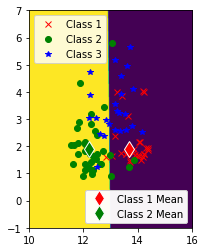

In [28]:
plotDecBoundaries_12(wine_test[:,:2], wine_test[:,13],np.array(list(mean_list_wine.values())[:2][:]))

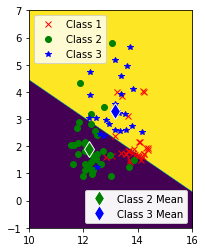

In [26]:
plotDecBoundaries_23(wine_test[:,:2], wine_test[:,13],np.array(list(mean_list_wine.values())[1:3][:]))

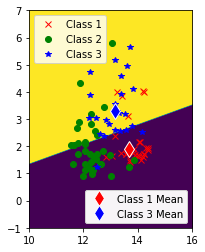

In [32]:
plotDecBoundaries_31(wine_test[:,:2], wine_test[:,13],np.array(list(mean_list_wine.values()))[[0,2],:])

In [27]:
def plotDecBoundaries_12(training, label_train, sample_mean):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  len(sample_mean)

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
    # m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    # l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()

In [25]:
def plotDecBoundaries_23(training, label_train, sample_mean):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  len(sample_mean)

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')
    # m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    # l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 2 Mean', 'Class 3 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()

In [31]:
def plotDecBoundaries_31(training, label_train, sample_mean):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  len(sample_mean)

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='b', markeredgecolor='w')
    # m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    # l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 3 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()

In [18]:
def plotDecBoundaries(training, label_train, sample_mean):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()

c, A plot showing the final decision boundaries and regions (No indeterminate region)

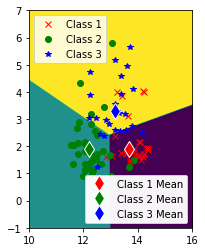

In [19]:
# plot the (testing-set) data points, the resulting class means, decision boundaries, and decision regions
plotDecBoundaries(wine_test[:,:2], wine_test[:,13],np.array(list(mean_list_wine.values())))